# Computational Economics  (ECO288)

## Tutorial: Epidemiology Models


H.W. Heathcote: epidemiologic models are *deterministic models for infectious diseases which are spread by direct person-to-person contact in a population*.

This kind of models has been used since by a few decades by economist, for matters that have nothing to do with health.

- diffusion of information, or opinions on social medias
- asset prices and fads
- expectation formation for macroeconomic outcomes (ex: *The Epidemiology of Macroeconomic Expectations* by Chris Carroll)

Epidemiologic models have two features that depart from standard economic models:

- Agent's behaviour does not take the full system into account, an is irrational in the sense that it isn't forwards looking. Instead, an agent is given a behavioural heuristic.
- The transitions of the whole system can be determined without solving for complex interactions first.

Understanding why these two assumptions are very costly for economists will keep us busy during a big part of the course. Here we just consider two simple models as small programming exercises.

### Simple SIR model

There is a continuum of agents of mass $1$. Each agent can be either "Susceptible" (S), "Infected" (I) or "Recovered" (R).
Agents meet randomly. Each agent meets another agent drawn randomly in each period.
During a meeting susceptible agents who meet and infected agent will always catch the disease (or the fad) but are not contagious. Infected agents, have a probability $\pi$ of being recovered. No distinction is made between recovering as a healthy or a dead person.

We're interested in the evolution in the number infected persons, both the speed of infection and the total amount of infected people in every period.

__Write down the transition equations for $n_I$, the number of infected people, for $n_R$ the number of recovered people and $n_S$ the number of susceptible people.__



$n_{R,t} = n_{R,t-1} + n_{I,t-1}*\pi$

$n_{I,t} = n_{I,t-1} - \pi n_{I,t-1} +  n_{S,t-1}\frac{n_{I,t-1}}{1}$

$n_{S,t} = n_{S,t-1} -  n_{S,t-1}\frac{n_{I,t-1}}{1}$

Recall $1 = n_I + n_S + n_R$

__Compute the transition matrix $M$ for the vector state $s_t$ such that $s_{t+1}= M s_t$__



In [1]:
Π = 0.05

0.05

In [2]:
function f(s)
    n_S, n_I, n_R = s
    new_recovered = n_I*Π
    new_infected = n_S*n_I
    nn_R = n_R + new_recovered
    nn_S = n_S - new_infected
    nn_I = n_I + new_infected - new_recovered
    return [nn_S, nn_I, nn_R]
end

f (generic function with 1 method)

In [3]:
f([0.3,0.4,0.3])

3-element Array{Float64,1}:
 0.18
 0.5
 0.32

__Compute the transitions over $T$ periods. Plot the result using Plots.jl. (bonus: check against closed form solution)__



In [4]:
T = 100
v0 = [0.3,0.4,0.3]
sim = Vector{Float64}[]
for t=1:T
    push!(sim,v0)
    v1 = f(v0)
    v0= v1
end

In [5]:
import Pkg
Pkg.add("Plots")
using Plots

   Updating registry at `~/.juliapro/JuliaPro_v1.4.0-1/registries/JuliaPro`
######################################################################### 100.0%###                                                     31.3%####                                                 36.2%##                                              40.1%###########                                           45.0%#########################                    76.4%########################               82.3%##############       94.0%
  Resolving package versions...
   Updating `~/.juliapro/JuliaPro_v1.4.0-1/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.juliapro/JuliaPro_v1.4.0-1/environments/v1.4/Manifest.toml`
 [no changes]


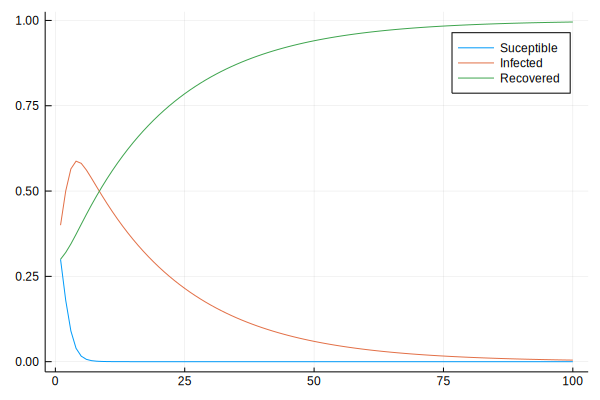

In [7]:
pl = plot(x=1:T, [el[1] for el in sim], label="Suceptible")

plot!(pl, x=1:T, [el[2] for el in sim], label="Infected")
plot!(pl, x=1:T, [el[3] for el in sim], label="Recovered")

__Write a function of $\mu$, $\pi$ which returns the simulation. Compare different values of the parameters. How would you interpret "social distancing"?__

### A Spatial SIR model

We now consider another version of the model where agents evolve in the space $\mathcal{S}=[0,1]\times[0,1]$. There are $N\in\mathbb{N}$ agent. At any date, each agent $n \in [0,1]$  is located at $(x_n,y_n)\in \mathcal{S}$.

Each agent moves follows a random walk bounded by $\mathcal{S}$:
$$x_t = \min(\max( x_{t-1} + \epsilon_t, 0), 1)$$
$$y_t = \min(\max( y_{t-1} + \eta_t, 0), 1)$$
where $\epsilon_t$ and $\eta_t$ are both normally distributed with standard deviation $\sigma$.

At any date, the individual state of an agent is $s_t=(x_t, y_t, h_t)$ where $h_t$ is either "S", "I" or "R". $v_t$ denotes the states of all agents (for instance $v_t=(s_{n,t})_n$. The health status of each agent is updated in the following way:

- Agents $R$ stay $R$.
- Agents $I$ have probability $\pi$ to become $R$. They stay $I$ otherwise.
- An agent of type $S$ in position $(x,y)$ has a probability $prob(x,y,S)$ to be infected that is $\mu$ if there is another infected agent within a radius $r>0$.


__Define a type `Agent`, which holds the type of an agent. The state of the whole system will be held in a `Vector[Agent]` type.__



__Write a function `spatial_transition(S::Vector[Agent])::Vector[Agent]` to compute the transition of the positions. Write another function `random_guess(T=100)` which simulates for $T$ periods in order to find a good initial guess.__



__Write a function `show_population` to plot all agents with different colors for different health status.__



__Write a function `evolve(S::Vector[Agent])::Vector[Agent]` which takes the population in a given state and returns the same population with updated health status.__



__Write a function `simulate(S0::Vector[Agent], k=1)` to simulate the economy starting from an initially random position with `k` infected individuals. The returned object should be of type `Vector[Vector[Agent]]`.__



__Compute statistics along a simulated path for $n_I$, $n_S$, $n_R$. Plot and compare with the basic SIR model__

### Additional questions

Have fun by trying to answer one of these questions:
- change probability of infection so that it depends on the number of infected people in the vincinity (with some suitable functional formulation for)
- compute an animation of the transition
- compute an interactive visualisation (with `Interact.jl` if available)